In [175]:
# Declaration

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('all-data.csv', converters={'MEDCLASS': lambda x: str(x), 'PREVMEDCLASS': lambda x: str(x)})
df['BIRTHDATE'] = pd.to_datetime(df['BIRTHDATE'], format='%Y-%m-%d')
df['DEATHDATE'] = pd.to_datetime(df['DEATHDATE'], format='%Y-%m-%d')
df['HT_START'] = pd.to_datetime(df['HT_START'], format='%Y-%m-%d')
df['COB_START'] = pd.to_datetime(df['COB_START'], format='%Y-%m-%d')

## Predicting diabetes medication using logistic regression

In [193]:
data = df.drop(
    ['ID', 'BIRTHDATE', 'DEATHDATE', 'AGEDEAD', 'DEAD', 'IS_DM', 'DM_FIRSTMED', 'DM_MEDSTART', 
     'METFORMIN', 'SGLT2', 'GLP1', 'INSULIN', 'HT_AGE', 'HT_START', 'COB_START', 'COB_AGE', 'FEV1']
    , axis=1, errors='ignore')

data['PREVMEDCLASS'].replace('NULL', '0000', inplace=True)

data = data[(~data.HBA1C.isna())].reset_index(drop=True)
data = pd.get_dummies(data = data, columns=['ETHNICITY', 'RACE', 'PREVMEDCLASS'])
data

,GENDER,DM_AGE,DM_MEDAGE,MEDCLASS,IS_HT,IS_COB,HBA1C,BMI,SYSTOLIC,DIASTOLIC,...,RACE_hispanic,RACE_white,PREVMEDCLASS_0000,PREVMEDCLASS_0001,PREVMEDCLASS_1000,PREVMEDCLASS_1001,PREVMEDCLASS_1100,PREVMEDCLASS_1101,PREVMEDCLASS_1110,PREVMEDCLASS_1111
0,0,41,49,1100,1,0,9.1,42.33,149.0,99.0,...,0,0,0,0,1,0,0,0,0,0
1,1,43,43,1000,1,0,7.7,30.88,194.0,105.0,...,0,1,1,0,0,0,0,0,0,0
2,0,50,55,1100,1,0,9.1,42.24,194.0,120.0,...,1,0,0,0,1,0,0,0,0,0
3,0,50,57,1100,1,0,9.1,42.24,167.0,104.0,...,1,0,0,0,0,0,1,0,0,0
4,0,50,59,1100,1,0,9.1,42.24,199.0,117.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16810,1,49,49,1000,1,0,7.6,30.59,145.0,113.0,...,0,1,1,0,0,0,0,0,0,0
16811,1,33,33,1000,1,0,7.7,30.65,176.0,109.0,...,1,0,1,0,0,0,0,0,0,0
16812,0,44,44,1000,1,0,7.6,30.31,200.0,93.0,...,0,1,1,0,0,0,0,0,0,0
16813,0,44,43,1001,1,0,6.1,30.31,162.0,104.0,...,0,1,0,0,1,0,0,0,0,0


<AxesSubplot:xlabel='0', ylabel='1'>

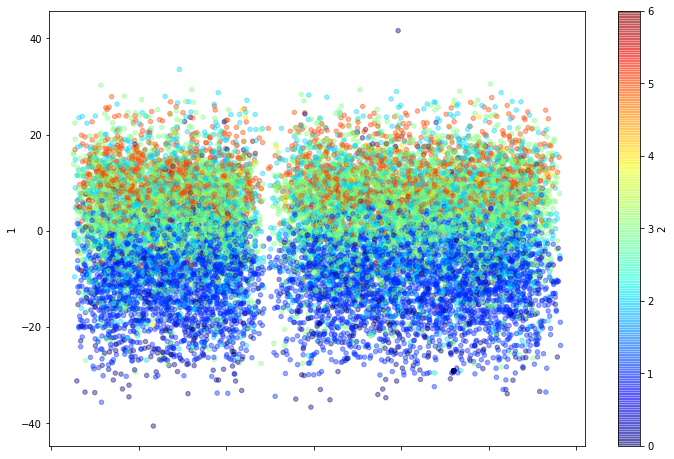

In [194]:
#def plotting_data():
le = LabelEncoder()

y = data.loc[:, 'MEDCLASS']
y = le.fit_transform(y)
x = data.drop(['MEDCLASS'], axis=1)

pca = PCA(n_components = 2)
newdata = pd.DataFrame(pca.fit_transform(x))
newdata[2] = y
newdata.plot(kind='scatter',  x=0, y=1, alpha=0.4, figsize=(12,8), c=2, cmap=plt.get_cmap('jet'))
    
#plotting_data()

In [189]:
y = data['MEDCLASS']
x = data.drop(['MEDCLASS'], axis=1)

# data split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=123)

solver='lbfgs'
penalty='l2'
class_weight='balanced'
max_iter=6000
crossval = 5

logreg = LogisticRegression(solver=solver, penalty=penalty, class_weight=class_weight, max_iter=max_iter)

pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('cls', logreg)
])
pipe.fit(x_train, y_train)


scores = cross_val_score(pipe, x_train, y_train, cv=crossval)
display(scores.mean())

0.8824704128728695

In [190]:
y_hat_test = pipe.predict(x_test)
display(accuracy_score(y_test, y_hat_test))

0.8807612250966399

In [191]:
display(f1_score(y_test, y_hat_test, average='micro'))
display(f1_score(y_test, y_hat_test, average='macro'))
display(f1_score(y_test, y_hat_test, average='weighted'))
display(f1_score(y_test, y_hat_test, average=None))

0.6733619251208715

0.8807612250966399

0.9110664426368784

array([0.97975709, 0.98504274, 0.98124531, 0.93357765, 0.07751938,
       0.67946824, 0.07692308])

In [192]:
def binstr_to_name(str):
    d = ['METFORMIN', 'GLP1', 'SGLT2', 'INSULIN']
    result_arr = []
    result_str = ''
    for i in range(0, len(str)):
        if str[i] == '1':
            result_arr.append(d[i])
    if result_arr:
        result_str = ' + '.join(result_arr)
    return result_str

y_hat_test = pipe.predict(x_test)

# confusion matrix
conmat = confusion_matrix(y_test, y_hat_test)

#display
labels = np.unique(y_test)

textlabels = []
for i in range(0, len(labels)):
    textlabels.append(binstr_to_name(labels[i]))
pd.DataFrame(conmat, index=textlabels, columns=textlabels)

,INSULIN,METFORMIN,METFORMIN + INSULIN,METFORMIN + GLP1,METFORMIN + GLP1 + INSULIN,METFORMIN + GLP1 + SGLT2,METFORMIN + GLP1 + SGLT2 + INSULIN
INSULIN,121,5,0,0,0,0,0
METFORMIN,0,922,0,0,0,0,0
METFORMIN + INSULIN,0,12,654,3,7,0,1
METFORMIN + GLP1,0,11,2,1019,106,1,9
METFORMIN + GLP1 + INSULIN,0,0,0,13,10,8,8
METFORMIN + GLP1 + SGLT2,0,0,0,0,89,230,110
METFORMIN + GLP1 + SGLT2 + INSULIN,0,0,0,0,7,9,6


## Predicting diabetes medication using Random Forest

In [169]:
data = df.drop(
    ['ID', 'BIRTHDATE', 'DEATHDATE', 'AGEDEAD', 'DEAD', 'IS_DM', 'DM_FIRSTMED', 'DM_MEDSTART', 
     'METFORMIN', 'SGLT2', 'GLP1', 'INSULIN', 'HT_AGE', 'HT_START', 'COB_START', 'COB_AGE', 'FEV1']
    , axis=1, errors='ignore')

data['PREVMEDCLASS'].replace('NULL', '0000', inplace=True)

data = data[~data.HBA1C.isna()].reset_index(drop=True)
data = pd.get_dummies(data = data, columns=['ETHNICITY', 'RACE', 'PREVMEDCLASS'])
data

,GENDER,DM_AGE,DM_MEDAGE,MEDCLASS,IS_HT,IS_COB,HBA1C,BMI,SYSTOLIC,DIASTOLIC,...,RACE_hispanic,RACE_white,PREVMEDCLASS_0000,PREVMEDCLASS_0001,PREVMEDCLASS_1000,PREVMEDCLASS_1001,PREVMEDCLASS_1100,PREVMEDCLASS_1101,PREVMEDCLASS_1110,PREVMEDCLASS_1111
0,0,41,49,1100,1,0,9.1,42.33,149.0,99.0,...,0,0,0,0,1,0,0,0,0,0
1,1,43,43,1000,1,0,7.7,30.88,194.0,105.0,...,0,1,1,0,0,0,0,0,0,0
2,0,50,55,1100,1,0,9.1,42.24,194.0,120.0,...,1,0,0,0,1,0,0,0,0,0
3,0,50,57,1100,1,0,9.1,42.24,167.0,104.0,...,1,0,0,0,0,0,1,0,0,0
4,0,50,59,1100,1,0,9.1,42.24,199.0,117.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16810,1,49,49,1000,1,0,7.6,30.59,145.0,113.0,...,0,1,1,0,0,0,0,0,0,0
16811,1,33,33,1000,1,0,7.7,30.65,176.0,109.0,...,1,0,1,0,0,0,0,0,0,0
16812,0,44,44,1000,1,0,7.6,30.31,200.0,93.0,...,0,1,1,0,0,0,0,0,0,0
16813,0,44,43,1001,1,0,6.1,30.31,162.0,104.0,...,0,1,0,0,1,0,0,0,0,0


In [171]:
y = data['MEDCLASS']
x = data.drop(['MEDCLASS'], axis=1)

# data split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=53)

rf = RandomForestClassifier(n_estimators=20, max_leaf_nodes=16,  n_jobs=-1)
rf.fit(x_train, y_train)

scores = cross_val_score(rf, x_train, y_train, cv=5)
display(scores.mean())

0.9342886863688544

In [172]:
y_hat_test = rf.predict(x_test)
display(accuracy_score(y_test, y_hat_test))

0.8965209634255129

In [181]:
display(f1_score(y_test, y_hat_test, average='macro'))
display(f1_score(y_test, y_hat_test, average='micro'))
display(f1_score(y_test, y_hat_test, average='weighted'))
display(f1_score(y_test, y_hat_test, average=None))

0.5617109282345554

0.8965209634255129

0.8751582511463112

array([0.37419355, 0.94758479, 0.99407407, 0.91242038, 0.        ,
       0.7037037 , 0.        ])